# STEP 0: Upload and view data

## Libraries

In [82]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import networkx as nx

## Data

### Team-employee affiliation

In [54]:
teams = pd.read_csv("team_employee_affiliations.csv")
teams.head()

,team_id,empl_id
0,8,1
1,82,2
2,70,3
3,51,4
4,28,5


### Project outcomes

In [55]:
outcome = pd.read_csv("project_outcomes.csv")
outcome.head()

,team_id,project_tech_success,project_duration,project_novelty
0,8,0,89.504485,2.946377
1,82,1,81.995252,2.863422
2,70,1,90.027666,2.580469
3,51,1,90.099652,4.530003
4,28,1,87.894811,1.764565


In [56]:
outcome.describe().T

,count,mean,std,min,25%,50%,75%,max
team_id,101.0,51.000000,29.300171,1.000000,26.000000,51.000000,76.000000,101.000000
project_tech_success,101.0,0.772277,0.421454,0.000000,1.000000,1.000000,1.000000,1.000000
project_duration,101.0,87.298610,4.272208,76.966203,84.255601,87.822158,90.027666,100.726983
project_novelty,101.0,3.024340,0.656166,1.342613,2.555055,3.060508,3.486283,4.600945


### Knowledge exchange (ke) network

In [57]:
ke = pd.read_csv(
    "knowledge_exchange_network.csv",
    sep=",",
    header=None,
    names=["u", "v"]
)
ke.head()

,u,v
0,0,1
1,0,542
2,0,2
3,0,541
4,0,3


### Visualize ke netwok

Direction test: False 
Weight test: False 
Connectedness test: True


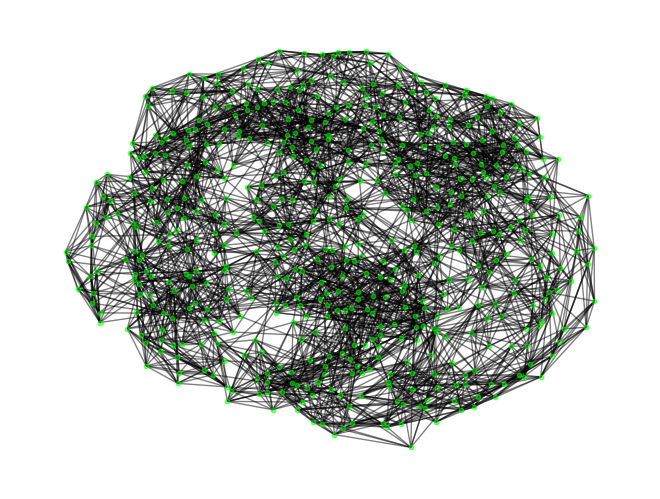

In [58]:
g = nx.from_pandas_edgelist(ke, source="u", target="v")
print("Direction test:", nx.is_directed(g),
      "\nWeight test:", nx.is_weighted(g),
      "\nConnectedness test:", nx.is_connected(g))

nx.draw_kamada_kawai(g, node_size=10, node_color="lime", alpha=0.5)

### Visualize nodes connected with zero

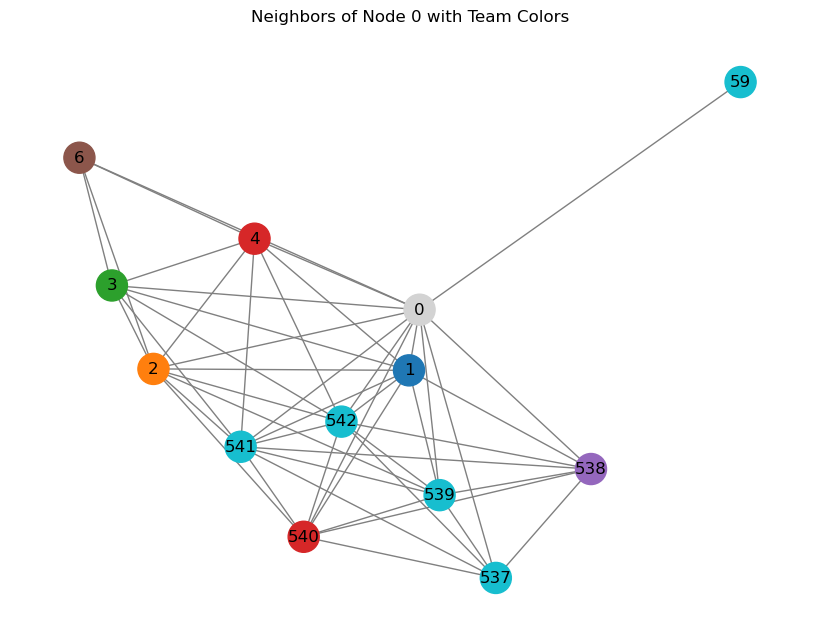

In [83]:
# Step 1: Create the graph from the connections DataFrame
g = nx.from_pandas_edgelist(ke, source="u", target="v")

# Step 2: Get neighbors of node 0
zero_neighbors = list(g.neighbors(0))

# Step 3: Create a subgraph with node 0 and its immediate neighbors
subgraph = g.subgraph([0] + zero_neighbors)

# Step 4: Create a color mapping based on team_id for neighbors
team_colors = {}
unique_teams = teams['team_id'].unique()

# Assign a unique color to each team using the updated method
color_map = mpl.colormaps['tab10']  # Updated to avoid deprecation warning

for idx, team in enumerate(unique_teams):
    team_members = teams[teams['team_id'] == team]['empl_id'].values
    for member in team_members:
        team_colors[member] = color_map(idx)  # Assign color for each member

# Step 5: Assign colors to nodes in the subgraph
node_colors = []
for node in subgraph.nodes():
    # Default color for nodes without a team
    color = 'lightgray'  
    if node in team_colors:
        color = team_colors[node]
    node_colors.append(color)

# Step 6: Create a layout for the subgraph
positions = nx.spring_layout(subgraph, seed=42)  # Set a seed for reproducibility

# Step 7: Draw the subgraph with colors and the layout
plt.figure(figsize=(8, 6))
nx.draw(subgraph, pos=positions, with_labels=True, node_color=node_colors, node_size=500, edge_color="gray")
plt.title("Neighbors of Node 0 with Team Colors")
plt.show()

# STEP 1: Knowledge exchange netwrok anlysis

## Node degree

### Node degrees

In [59]:
g_node_degree = nx.degree(g)
g_node_degree

DegreeView({0: 12, 1: 13, 542: 12, 2: 12, 541: 12, 3: 12, 540: 12, 4: 12, 539: 12, 538: 12, 6: 11, 537: 12, 59: 13, 5: 12, 7: 13, 293: 12, 508: 13, 69: 13, 9: 13, 259: 12, 141: 14, 8: 10, 10: 12, 11: 12, 12: 11, 13: 12, 150: 11, 14: 12, 15: 13, 44: 12, 463: 11, 16: 12, 17: 11, 18: 12, 19: 12, 20: 12, 533: 13, 21: 12, 328: 12, 22: 13, 23: 12, 24: 12, 25: 11, 26: 12, 27: 12, 28: 11, 457: 12, 29: 13, 346: 13, 30: 13, 411: 13, 31: 12, 32: 11, 33: 12, 173: 13, 34: 11, 35: 14, 266: 12, 36: 13, 469: 13, 37: 12, 38: 12, 204: 13, 39: 12, 40: 12, 41: 12, 359: 12, 83: 13, 42: 11, 400: 12, 43: 13, 45: 12, 257: 11, 46: 12, 47: 12, 48: 12, 49: 12, 461: 11, 50: 12, 51: 12, 52: 14, 281: 12, 326: 13, 53: 12, 54: 14, 55: 12, 97: 11, 56: 12, 57: 12, 111: 12, 58: 11, 218: 11, 189: 10, 282: 12, 149: 12, 321: 12, 320: 12, 60: 11, 61: 11, 152: 13, 62: 12, 63: 13, 64: 12, 65: 14, 496: 13, 66: 12, 67: 14, 68: 12, 303: 12, 70: 12, 71: 12, 283: 13, 164: 12, 72: 13, 73: 12, 480: 12, 128: 11, 74: 12, 75: 13, 76: 1

### Average Degree

In [60]:
g_k = np.mean([d for n, d in g_node_degree])
g_k

12.0

### Calculate degree distribution

In [61]:
g_node_degree = nx.degree(g)
g_dd = Counter([d for n, d in g_node_degree])
g_dd

Counter({12: 325, 11: 96, 13: 87, 14: 20, 10: 14, 9: 1})

### Visualize degree distribution

<function matplotlib.pyplot.show(close=None, block=None)>

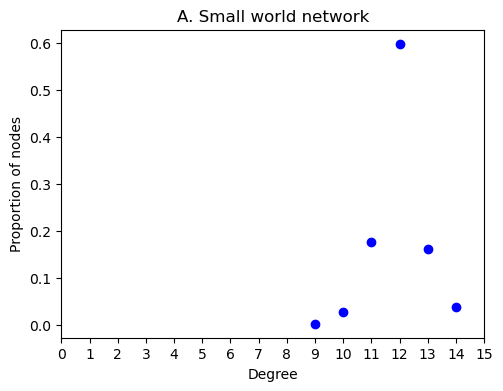

In [62]:
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)
props = [_/len(g.nodes()) for _ in g_dd.values()]

ax.scatter(g_dd.keys(), props, color='blue')
ax.set_xlabel('Degree')
ax.set_ylabel('Proportion of nodes')
ax.set_title('A. Small world network')
ax.set_xticks(np.arange(0, 16, 1))

plt.show

## Clustering

### Calustering coeffiecient

In [63]:
g_clustering = nx.clustering(g)
g_clustering

{0: 0.5606060606060606,
 1: 0.48717948717948717,
 542: 0.6515151515151515,
 2: 0.5606060606060606,
 541: 0.6666666666666666,
 3: 0.48484848484848486,
 540: 0.6060606060606061,
 4: 0.6212121212121212,
 539: 0.6818181818181818,
 538: 0.6818181818181818,
 6: 0.6363636363636364,
 537: 0.6666666666666666,
 59: 0.4358974358974359,
 5: 0.5606060606060606,
 7: 0.5256410256410257,
 293: 0.42424242424242425,
 508: 0.44871794871794873,
 69: 0.5769230769230769,
 9: 0.46153846153846156,
 259: 0.42424242424242425,
 141: 0.4725274725274725,
 8: 0.7555555555555555,
 10: 0.6666666666666666,
 11: 0.6515151515151515,
 12: 0.6545454545454545,
 13: 0.6515151515151515,
 150: 0.509090909090909,
 14: 0.5454545454545454,
 15: 0.5512820512820513,
 44: 0.5303030303030303,
 463: 0.5636363636363636,
 16: 0.6666666666666666,
 17: 0.6727272727272727,
 18: 0.6666666666666666,
 19: 0.6515151515151515,
 20: 0.6515151515151515,
 533: 0.5384615384615384,
 21: 0.6666666666666666,
 328: 0.5757575757575758,
 22: 0.551282051

### Clustering distribution

In [64]:
g_clustering_dist = Counter(g_clustering.values())
g_clustering_dist

Counter({0.6515151515151515: 71,
         0.6363636363636364: 53,
         0.6666666666666666: 51,
         0.6212121212121212: 22,
         0.5606060606060606: 21,
         0.5454545454545454: 21,
         0.5512820512820513: 19,
         0.5303030303030303: 18,
         0.6060606060606061: 16,
         0.6727272727272727: 16,
         0.6818181818181818: 13,
         0.5384615384615384: 13,
         0.6545454545454545: 12,
         0.5151515151515151: 12,
         0.5757575757575758: 11,
         0.5: 10,
         0.5256410256410257: 9,
         0.5909090909090909: 9,
         0.48484848484848486: 8,
         0.5641025641025641: 8,
         0.5769230769230769: 7,
         0.46153846153846156: 6,
         0.5636363636363636: 6,
         0.4835164835164835: 6,
         0.6909090909090909: 6,
         0.4696969696969697: 5,
         0.6181818181818182: 5,
         0.4358974358974359: 4,
         0.42424242424242425: 4,
         0.4727272727272727: 4,
         0.38461538461538464: 4,
   

#### Visualize clustering coefficient

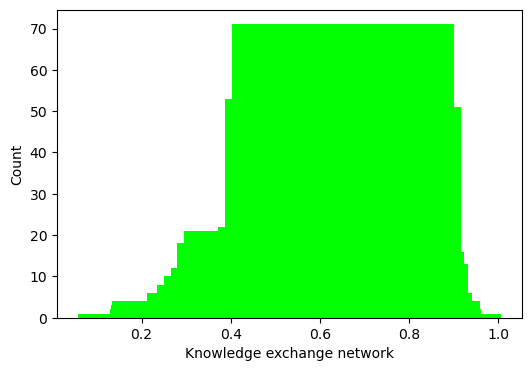

In [65]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.bar(
    g_clustering_dist.keys(),
    g_clustering_dist.values(),
    color="lime",
    label="Knowledge exchange network",
    width=0.5
)
ax.set_xlabel('Knowledge exchange network')
ax.set_ylabel('Count')

plt.show()

### Bridging Ties

#### Burt's Constant

In [66]:
g_burt_constr = nx.constraint(g)
g_burt_constr

{0: 0.19389080261931366,
 1: 0.17349513127847221,
 542: 0.21229408649280443,
 2: 0.1930316898174561,
 541: 0.21678744053634785,
 3: 0.17665999818352673,
 540: 0.2044769476751557,
 4: 0.20669449542191382,
 539: 0.22015412552999963,
 538: 0.21881760445150178,
 6: 0.21596899525307894,
 537: 0.21701646552124199,
 59: 0.16166921862298972,
 5: 0.19410352780690776,
 7: 0.18531049776694666,
 293: 0.16656530517580923,
 508: 0.16614376656800212,
 69: 0.1888872771895075,
 9: 0.17054927503773037,
 259: 0.164480335544948,
 141: 0.16750937450550335,
 8: 0.24659680791236738,
 10: 0.22033589086655808,
 11: 0.217305831780992,
 12: 0.22118280338718993,
 13: 0.21597416066785238,
 150: 0.1872214733098684,
 14: 0.1918491120487041,
 15: 0.1901624823662106,
 44: 0.1870575034910699,
 463: 0.20404685977491271,
 16: 0.2182709565886285,
 17: 0.22166684999358524,
 18: 0.21807713560882264,
 19: 0.2146115355523135,
 20: 0.21465267882262346,
 533: 0.18688481149187605,
 21: 0.21808820320985237,
 328: 0.19289814525963

#### Node betweenness centrality

In [67]:
g_nbc = nx.betweenness_centrality(g)
g_nbc

{0: 0.006873410178723041,
 1: 0.014590012347764195,
 542: 0.0016251400415492167,
 2: 0.007182261462206224,
 541: 0.0017627830843690764,
 3: 0.017847829456632724,
 540: 0.008804230002369691,
 4: 0.0018026718489838466,
 539: 0.0014402575183598203,
 538: 0.001631415239882291,
 6: 0.002373955512452113,
 537: 0.0018386201449279093,
 59: 0.013232628148630536,
 5: 0.008077369650344361,
 7: 0.008401043108437915,
 293: 0.013487638161960244,
 508: 0.016959503159684468,
 69: 0.007672786731314477,
 9: 0.014117644592326308,
 259: 0.017463862107309946,
 141: 0.018357739902727703,
 8: 0.00037369706817406224,
 10: 0.0015305091002973184,
 11: 0.00226835794392049,
 12: 0.0014457748569432737,
 13: 0.0019182475121455474,
 150: 0.0054081077310793365,
 14: 0.006954206039462272,
 15: 0.008090831178921164,
 44: 0.007727699270251686,
 463: 0.006002660068726254,
 16: 0.0012919239827155601,
 17: 0.0015102085991020146,
 18: 0.002514968497026225,
 19: 0.002111862542004855,
 20: 0.0020507726801210374,
 533: 0.00770

# STEP 2: Arrange metrics in a Pandas DataFrame

## Preparing data

### Team size counter

In [68]:
teams['team_size'] = 1
teams

,team_id,empl_id,team_size
0,8,1,1
1,82,2,1
2,70,3,1
3,51,4,1
4,28,5,1
...,...,...,...
538,68,539,1
539,51,540,1
540,75,541,1
541,62,542,1


### Dummy variable: "Is knowlege exchanging wit zero?"

In [70]:
zero_neighbors = list(g.neighbors(0))
teams['ke_zero'] = teams['empl_id'].isin(zero_neighbors).astype(int)
teams


,team_id,empl_id,team_size,ke_zero
0,8,1,1,1
1,82,2,1,1
2,70,3,1,1
3,51,4,1,1
4,28,5,1,0
...,...,...,...,...
538,68,539,1,1
539,51,540,1,1
540,75,541,1,1
541,62,542,1,1


### Node degree

In [71]:
g_node_degree_df = pd.DataFrame(g_node_degree, columns=["empl_id","node_degree"])
g_node_degree_df

,empl_id,node_degree
0,0,12
1,1,13
2,542,12
3,2,12
4,541,12
...,...,...
538,525,12
539,529,12
540,530,12
541,534,12


### Clustering

In [72]:
g_clustering_df = pd.DataFrame(g_clustering.items(), columns=["empl_id", "clust_coef"] )
g_clustering_df

,empl_id,clust_coef
0,0,0.560606
1,1,0.487179
2,542,0.651515
3,2,0.560606
4,541,0.666667
...,...,...
538,525,0.606061
539,529,0.606061
540,530,0.606061
541,534,0.651515


### Bridging ties

#### Burt's constraint

In [73]:
g_bconstraint_df = pd.DataFrame(g_burt_constr.items(), columns=["empl_id","burt_constr"])
g_bconstraint_df


,empl_id,burt_constr
0,0,0.193891
1,1,0.173495
2,542,0.212294
3,2,0.193032
4,541,0.216787
...,...,...
538,525,0.208014
539,529,0.205461
540,530,0.204765
541,534,0.213885


#### Node betweenness centrality

In [74]:
g_nbc_df = pd.DataFrame(g_nbc.items(), columns=["empl_id","nbc"])
g_nbc_df

,empl_id,nbc
0,0,0.006873
1,1,0.014590
2,542,0.001625
3,2,0.007182
4,541,0.001763
...,...,...
538,525,0.001941
539,529,0.001797
540,530,0.002166
541,534,0.001661


## Arranging the metrics

### Combining all into one data frame

In [78]:
merged_df = pd.merge(teams, g_node_degree_df, on="empl_id", how = "left")
merged_df = pd.merge(merged_df, g_clustering_df, on="empl_id", how = "left")
merged_df = pd.merge(merged_df, g_bconstraint_df, on="empl_id", how = "left")
merged_df = pd.merge(merged_df, g_nbc_df, on="empl_id", how = "left")
merged_df = merged_df[merged_df['team_id'] != 43]  # remove team 43 since it contains employee 543
merged_df

,team_id,empl_id,team_size,ke_zero,node_degree,clust_coef,burt_constr,nbc
0,8,1,1,1,13.0,0.487179,0.173495,0.014590
1,82,2,1,1,12.0,0.560606,0.193032,0.007182
2,70,3,1,1,12.0,0.484848,0.176660,0.017848
3,51,4,1,1,12.0,0.621212,0.206694,0.001803
4,28,5,1,0,12.0,0.560606,0.194104,0.008077
...,...,...,...,...,...,...,...,...
537,28,538,1,1,12.0,0.681818,0.218818,0.001631
538,68,539,1,1,12.0,0.681818,0.220154,0.001440
539,51,540,1,1,12.0,0.606061,0.204477,0.008804
540,75,541,1,1,12.0,0.666667,0.216787,0.001763


# STEP 4: Summarising the data using 'aggregate'

In [79]:
agg_teams = merged_df.groupby("team_id").agg({
    "team_size":"count",  # will count the number of employees in each team
    "ke_zero":"max",
    "node_degree":"mean",
    "clust_coef":"mean",
    "burt_constr":"mean",
    "nbc":"mean"
}).reset_index()
agg_teams

,team_id,team_size,ke_zero,node_degree,clust_coef,burt_constr,nbc
0,1,5,0,12.200000,0.543776,0.189966,0.010853
1,2,7,0,12.571429,0.531112,0.185680,0.008873
2,3,7,0,12.000000,0.519481,0.185298,0.010507
3,4,6,0,11.500000,0.602525,0.204481,0.003964
4,5,8,0,12.125000,0.594260,0.200990,0.005134
...,...,...,...,...,...,...,...
95,97,4,0,12.500000,0.559441,0.190590,0.008178
96,98,11,0,12.090909,0.590033,0.201239,0.005840
97,99,4,0,12.250000,0.632867,0.207942,0.003169
98,100,3,0,12.000000,0.603030,0.207263,0.004612


# STEP 5: Merge aggrggate with 'project_outcomes'

## Creating the combined data frame

In [80]:
final_df = pd.merge(agg_teams, outcome, on="team_id", how = "left")
final_df

,team_id,team_size,ke_zero,node_degree,clust_coef,burt_constr,nbc,project_tech_success,project_duration,project_novelty
0,1,5,0,12.200000,0.543776,0.189966,0.010853,0,91.059679,3.528110
1,2,7,0,12.571429,0.531112,0.185680,0.008873,1,92.116045,3.057953
2,3,7,0,12.000000,0.519481,0.185298,0.010507,1,97.440085,3.746968
3,4,6,0,11.500000,0.602525,0.204481,0.003964,1,88.752949,2.685005
4,5,8,0,12.125000,0.594260,0.200990,0.005134,1,84.906637,3.026805
...,...,...,...,...,...,...,...,...,...,...
95,97,4,0,12.500000,0.559441,0.190590,0.008178,0,85.202386,3.609955
96,98,11,0,12.090909,0.590033,0.201239,0.005840,1,87.799423,3.266782
97,99,4,0,12.250000,0.632867,0.207942,0.003169,1,82.887810,2.790244
98,100,3,0,12.000000,0.603030,0.207263,0.004612,1,79.673860,2.720417


## Creating a .csv file of the 'final_df' to use for further analysis

In [81]:
final_df.to_csv("silicon_stat_df.csv", index=False)

# ADDITIONAL ANALYSIS: ke network within teams

## No knowledge exchange within team

In [30]:
# Create the graph from the connections DataFrame
g = nx.from_pandas_edgelist(ke, source="u", target="v")

# Initialize a list to store isolated teams
isolated_teams = []

# Iterate through each team
for team_id in teams['team_id'].unique():
    # Get members of the current team
    team_members = teams[teams['team_id'] == team_id]['empl_id'].values
    
    # Create a subgraph for the team members
    team_subgraph = g.subgraph(team_members)
    
    # Check if there are any edges in the team's subgraph
    if len(team_subgraph.edges()) == 0:  # No connections among members
        isolated_teams.append(team_id)

# Print the isolated teams
print("Number of Teams with no connections among members:", len(isolated_teams))
print("Teams with no connections among members:", isolated_teams)


Number of Teams with no connections among members: 72
Teams with no connections among members: [8, 70, 51, 28, 40, 10, 80, 15, 1, 18, 44, 49, 14, 101, 7, 20, 91, 50, 11, 22, 27, 65, 19, 43, 56, 12, 35, 69, 42, 2, 21, 86, 32, 17, 48, 61, 94, 36, 54, 47, 81, 57, 31, 55, 76, 99, 83, 71, 45, 73, 97, 77, 33, 63, 84, 90, 29, 38, 26, 6, 23, 93, 67, 68, 37, 16, 88, 96, 74, 59, 78, 52]


## Knowledge exchange within team

In [31]:
# Create the graph from the connections DataFrame
g = nx.from_pandas_edgelist(ke, source="u", target="v")

# Initialize a list to store connected teams
connected_teams = []

# Iterate through each team
for team_id in teams['team_id'].unique():
    # Get members of the current team
    team_members = teams[teams['team_id'] == team_id]['empl_id'].values
    
    # Create a subgraph for the team members
    team_subgraph = g.subgraph(team_members)
    
    # Check if there are any edges in the team's subgraph
    if len(team_subgraph.edges()) > 0:  # At least one connection among members
        connected_teams.append(team_id)

# Print the connected teams
print("Number of Teams with at least one connection among members:", len(connected_teams))
print("Teams with at least one connection among members:", connected_teams)

Number of Teams with at least one connection among members: 29
Teams with at least one connection among members: [82, 87, 13, 41, 34, 72, 39, 98, 89, 5, 53, 58, 24, 3, 100, 92, 4, 66, 25, 46, 30, 79, 85, 9, 60, 95, 75, 64, 62]


## Sample of teams with employees having at least 1 knowledge exchange edge

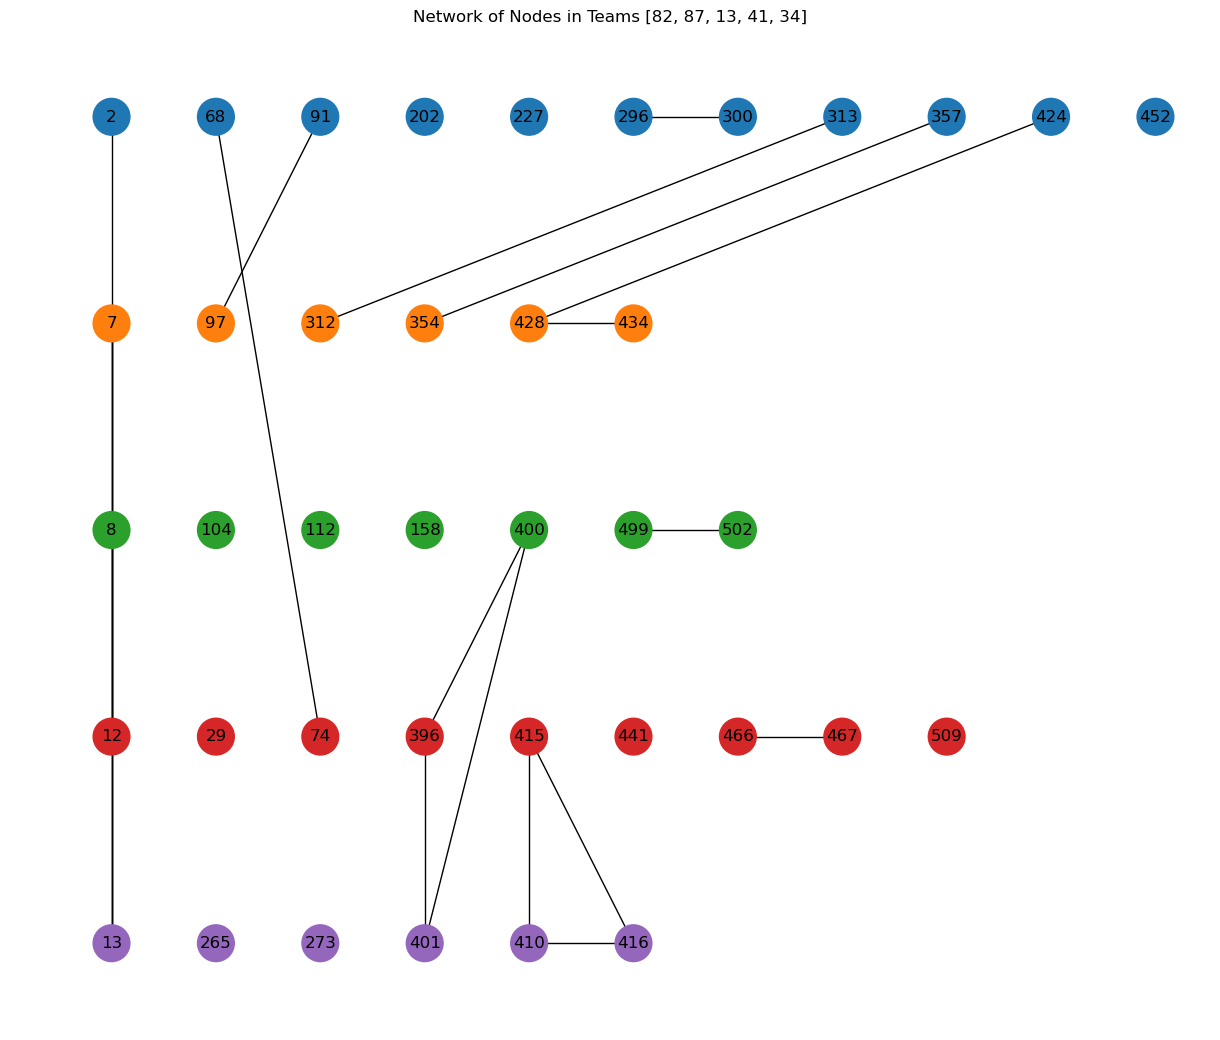

In [84]:
# Create the graph from the connections DataFrame
g = nx.from_pandas_edgelist(ke, source="u", target="v")

# Filter for teams of interest
teams_of_interest = [82, 87, 13, 41, 34]
nodes_of_interest = teams[teams['team_id'].isin(teams_of_interest)]['empl_id'].tolist()

# Create a subgraph with only the nodes in teams of interest
subgraph = g.subgraph(nodes_of_interest)

# Define colors for each team using a colormap
unique_teams = teams_of_interest
color_map = mpl.colormaps['tab10']  # Updated to avoid deprecation warning
team_colors = {team: color_map(idx) for idx, team in enumerate(unique_teams)}

# Create a color mapping for nodes in the subgraph based on their team
node_color_map = [team_colors.get(teams.loc[teams['empl_id'] == node, 'team_id'].values[0], 'lightblue') for node in subgraph.nodes()]

# Initialize position dictionary
pos = {}
y_spacing = 2  # Space between rows for different teams

# Position nodes based on team membership
for idx, team_id in enumerate(unique_teams):
    team_nodes = teams[teams['team_id'] == team_id]['empl_id'].tolist()
    num_nodes = len(team_nodes)
    
    # Calculate x positions for each member in the team
    for i, node in enumerate(team_nodes):
        pos[node] = (i, -idx * y_spacing)  # Set y based on team index, x based on member index

# Set the figure size larger
plt.figure(figsize=(12, 10))

# Draw the subgraph
nx.draw(subgraph, pos, node_color=node_color_map, with_labels=True, node_size=700, edge_color='black')
plt.title('Network of Nodes in Teams [82, 87, 13, 41, 34]')
plt.show()


## Visual representation of full ke network

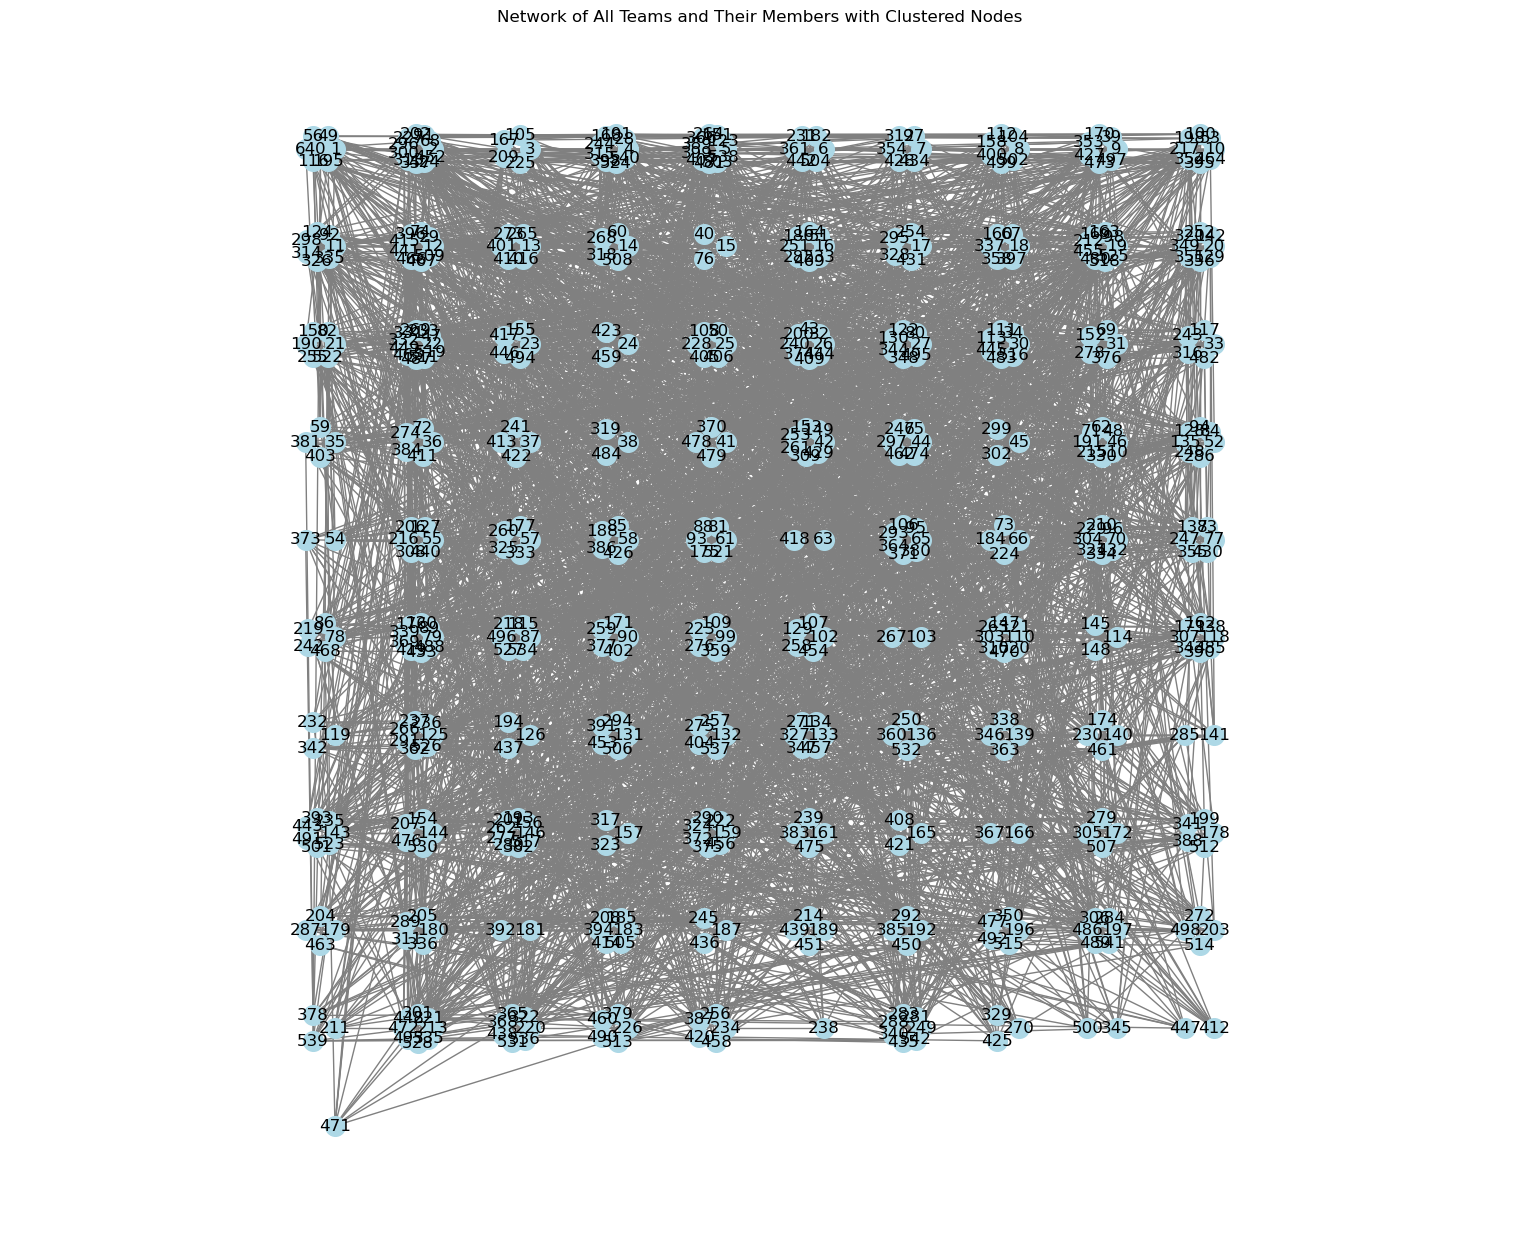

In [85]:
# Create the graph from the connections DataFrame
g = nx.from_pandas_edgelist(ke, source="u", target="v")

# Get all unique teams and their members
all_teams = teams['team_id'].unique()

# Initialize position dictionary
pos = {}
team_radius = 0.3  # Adjusted radius of the circle for each team
team_spacing_x = 2.0  # Horizontal spacing between teams
team_spacing_y = 2.0  # Vertical spacing between rows

# Position nodes in small circles based on team membership
for idx, team_id in enumerate(all_teams):
    team_nodes = teams[teams['team_id'] == team_id]['empl_id'].tolist()
    num_members = len(team_nodes)
    
    # Calculate angles for positioning in a circle
    angles = np.linspace(0, 2 * np.pi, num_members, endpoint=False)

    # Calculate row and column for the team position
    row = idx // 10  # Determine row index
    col = idx % 10   # Determine column index

    # Set the center position for the current team
    center_x = col * team_spacing_x
    center_y = -row * team_spacing_y  # Negative for downward stacking

    # Position each member in a circle around the center
    for i, node in enumerate(team_nodes):
        x = center_x + team_radius * np.cos(angles[i])  # x position
        y = center_y + team_radius * np.sin(angles[i])  # y position
        pos[node] = (x, y)

# Ensure that all nodes in the graph have a position
for node in g.nodes():
    if node not in pos:
        pos[node] = (0, 0)  # Default position for any unassigned nodes

# Set the figure size larger
plt.figure(figsize=(15, 12))  # Adjust height if needed

# Draw the graph
nx.draw(g, pos, with_labels=True, node_size=200, edge_color='gray', node_color='lightblue')
plt.title('Network of All Teams and Their Members with Clustered Nodes')
plt.axis('equal')  # Ensure equal aspect ratio
plt.show()


## Does knowledge share within a team matter for project success?

In [34]:
# Team IDs of interest
team_ids_of_interest = [82, 87, 13, 41, 34, 72, 39, 98, 89, 5, 53, 58, 24, 3, 100, 92, 4, 66, 25, 46, 30, 79, 85, 9, 60, 95, 75, 64, 62]

# Filter the DataFrame for the specified team IDs
filtered_outcome = outcome[outcome['team_id'].isin(team_ids_of_interest)]

#Count how many 1s in project_tech_success
count_ones = (filtered_outcome['project_tech_success'] == 1).sum()

# Calculate the percentage of 1s in project_tech_success
percentage_ones = (count_ones / len(filtered_outcome)) * 100 if len(filtered_outcome) > 0 else 0

# Print the results
print(f"Count of 1s in project_tech_success: {count_ones}")
print(f"Percentage of 1s in project_tech_success: {percentage_ones:.2f}%")

Count of 1s in project_tech_success: 24
Percentage of 1s in project_tech_success: 82.76%
